In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

### Data Processing and Collection

In [233]:
# load the csv file data to a pandas DataFrame
df = pd.read_csv("heart_disease_data.csv")

In [234]:
df.shape
# how many row and colums shows data

(303, 14)

In [235]:
df.head(5)
# for top 5 data shows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [236]:
df.tail(5)
# for bottom 5 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [237]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [238]:
df.info()
# getting information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [239]:
df.isnull().sum()
# checking for the missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [240]:
### we have no missing values

### Analysing the 'target' variable

In [241]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [242]:
df["target"].unique()

array([1, 0], dtype=int64)

In [243]:
# Checking the distribution of Target Variable
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1---> Defective Heart
0---> Healthy Heart

Checking cor-relation between columns

In [244]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [245]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

Exploratory Data Analysis (EDA)
First, analysing the target variable

<Axes: xlabel='target', ylabel='Count'>

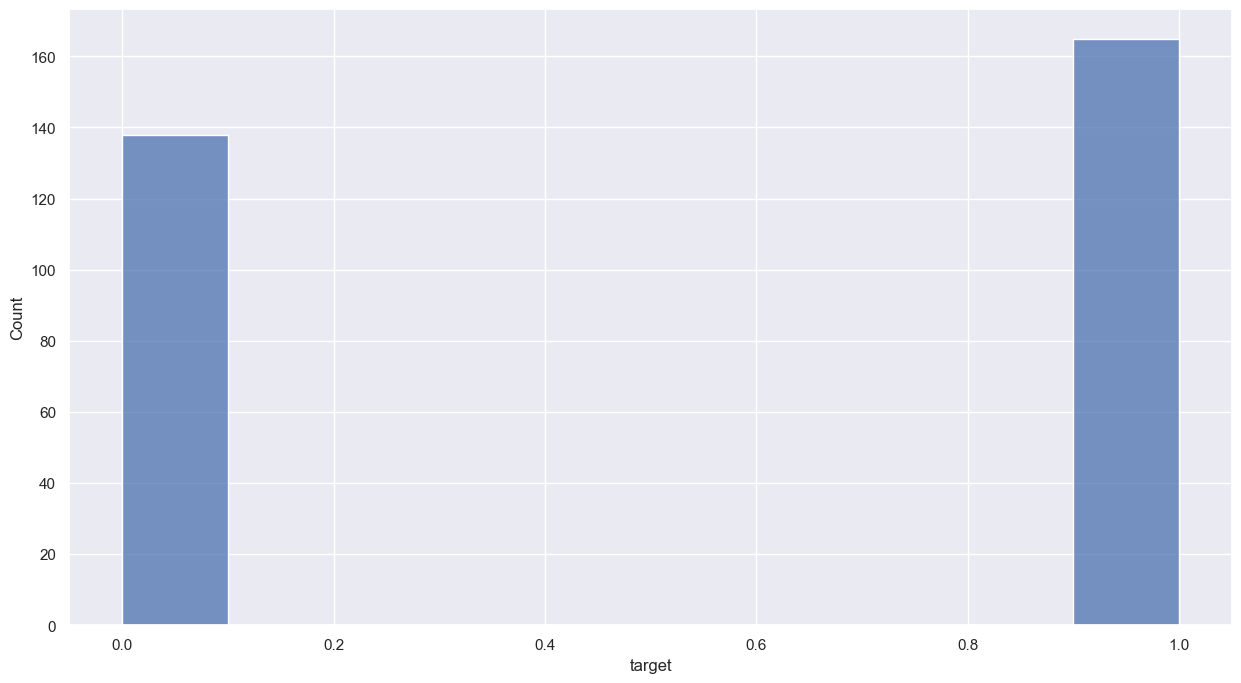

In [246]:
y = df["target"]

sns.histplot(y)


### Analysing the 'Sex' feature

In [247]:
df["sex"].unique()

array([1, 0], dtype=int64)

We notice 2 Unique sex features

<Axes: xlabel='sex', ylabel='target'>

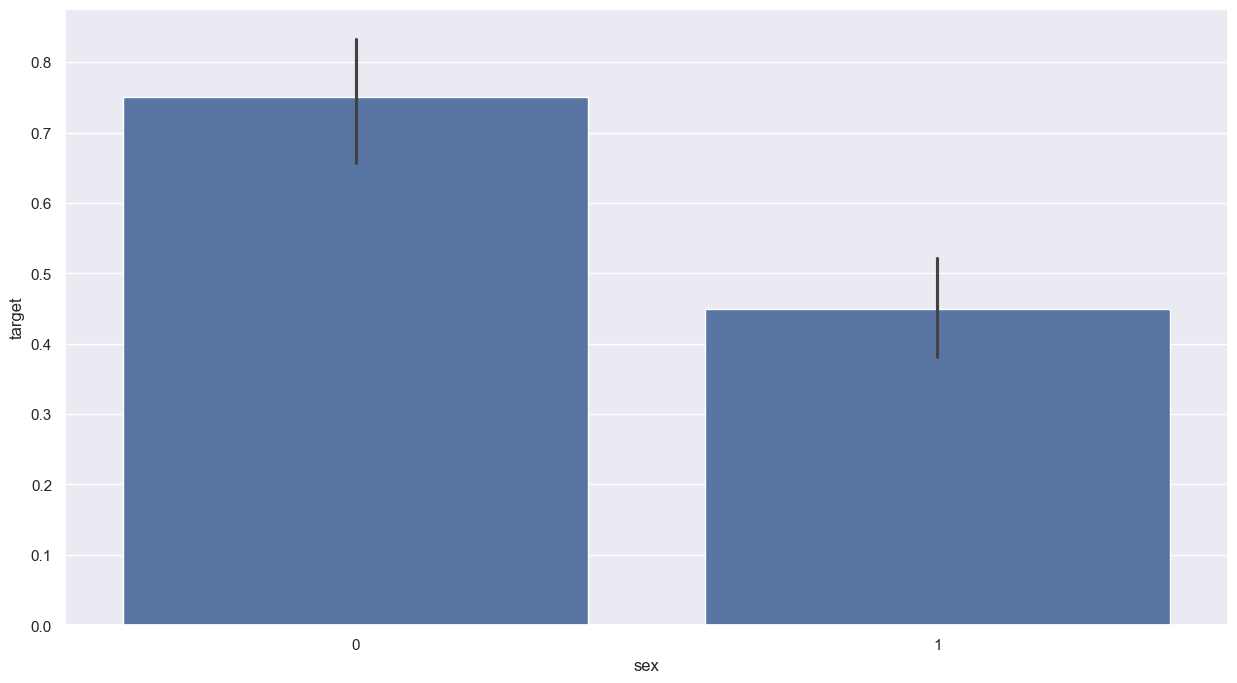

In [248]:
sns.barplot(x=df["sex"], y=df["target"])

We notice, that females are more likely to have heart problems than males

### Analysing the "Chest pain " features

In [249]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [250]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Chest pain features have 0 to 3 values

<Axes: xlabel='cp', ylabel='target'>

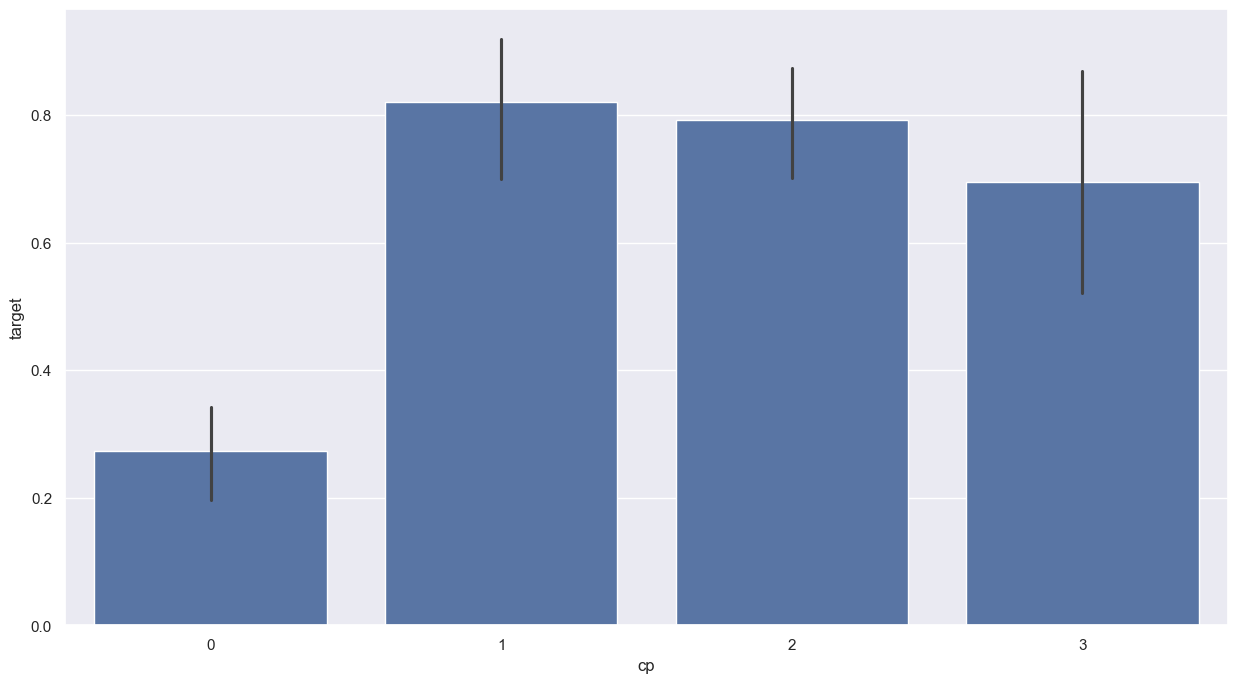

In [251]:
sns.barplot(x=df["cp"], y=df["target"])

we see the chest pain is 0 i.e the ones with typical angina are more less like to heart problems

### Analysing the Fasting blood sugar features

In [252]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [253]:
df["fbs"].unique()

array([1, 0], dtype=int64)

In [254]:
df["fbs"].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

<Axes: xlabel='fbs', ylabel='target'>

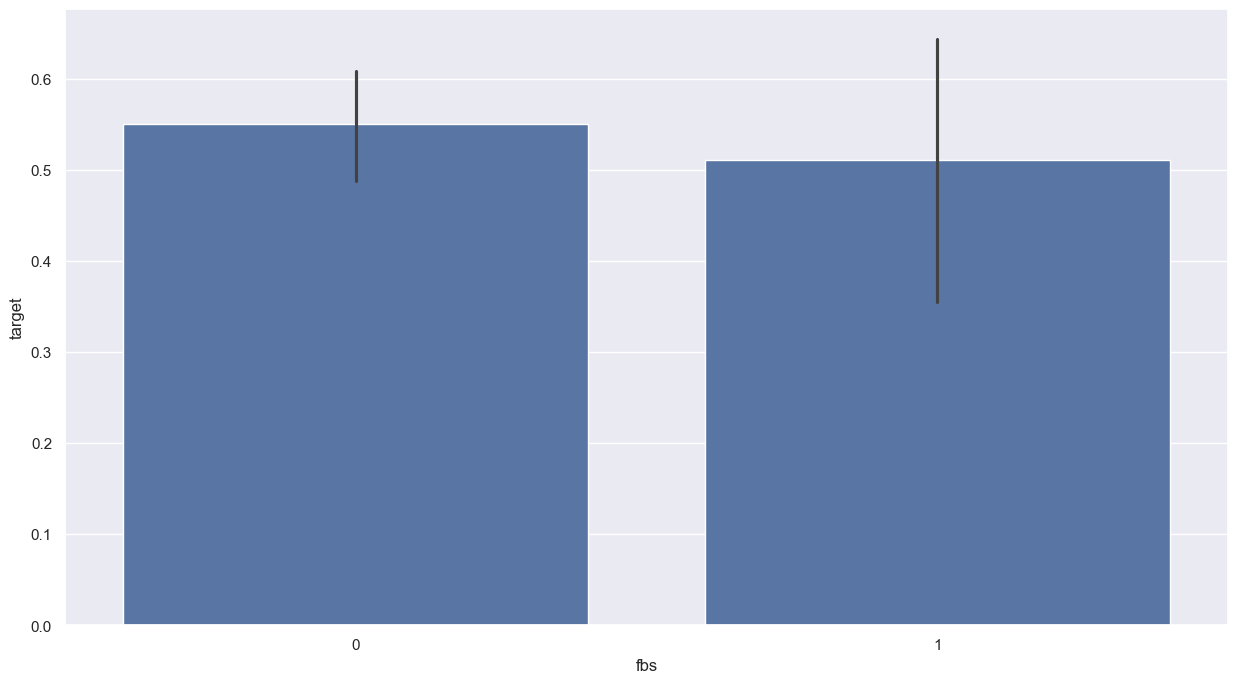

In [255]:
sns.barplot(x=df["fbs"], y=df["target"])

No more extraordinary / change here

### Analysing the resting electrocardiographic features

In [256]:
df["restecg"].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='target'>

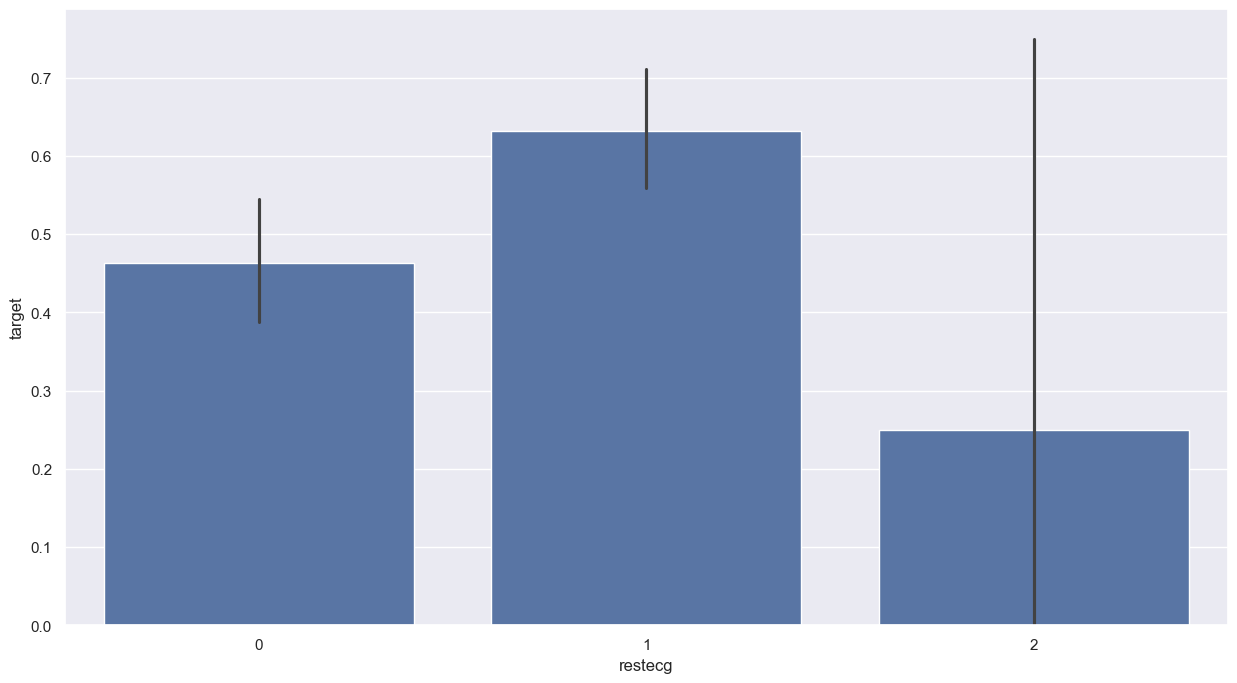

In [257]:
sns.barplot(x=df["restecg"], y=df["target"])

We realize the people with restecg "1" and "0" are are much more likely to have a heart disease than with restecg "2"

### Analysing the "exercise induced angina" feature

In [258]:
df["exang"].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

<Axes: xlabel='exang', ylabel='target'>

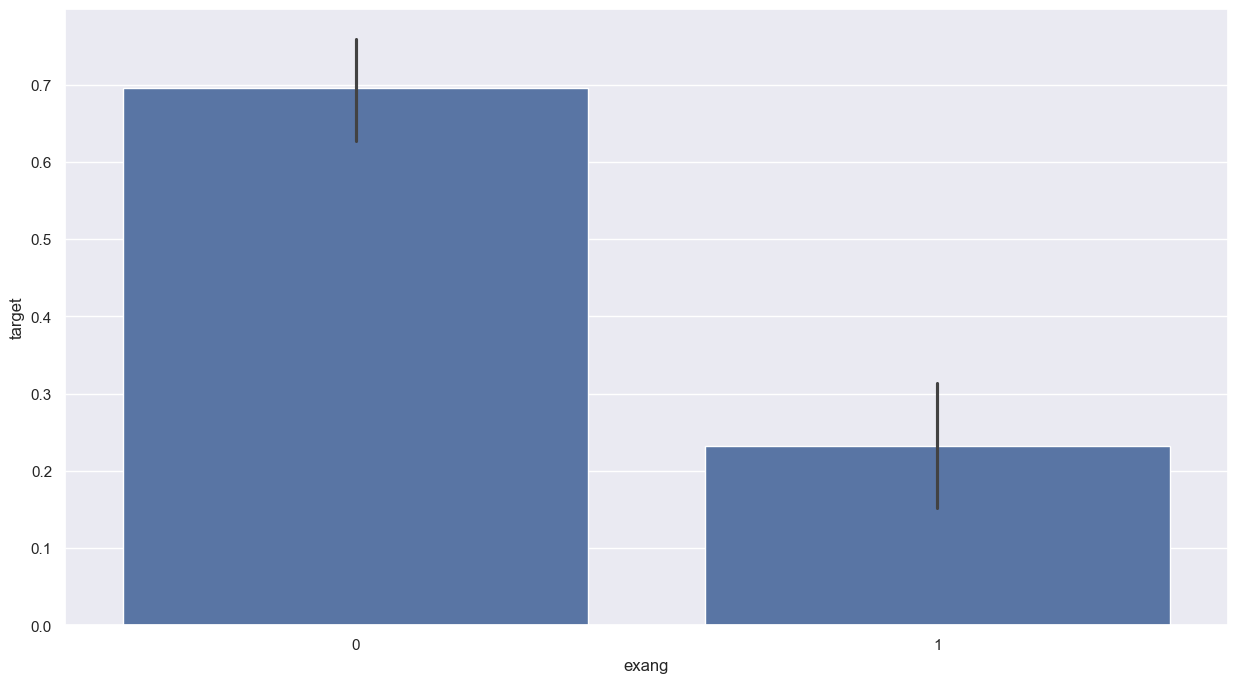

In [259]:
sns.barplot(x=df["exang"], y=df["target"])

People with exang is 1 i.e Exercise induced angina are more less like a heart problems

### Analysing the Slope feature

In [260]:
df["slope"].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

<Axes: xlabel='slope', ylabel='target'>

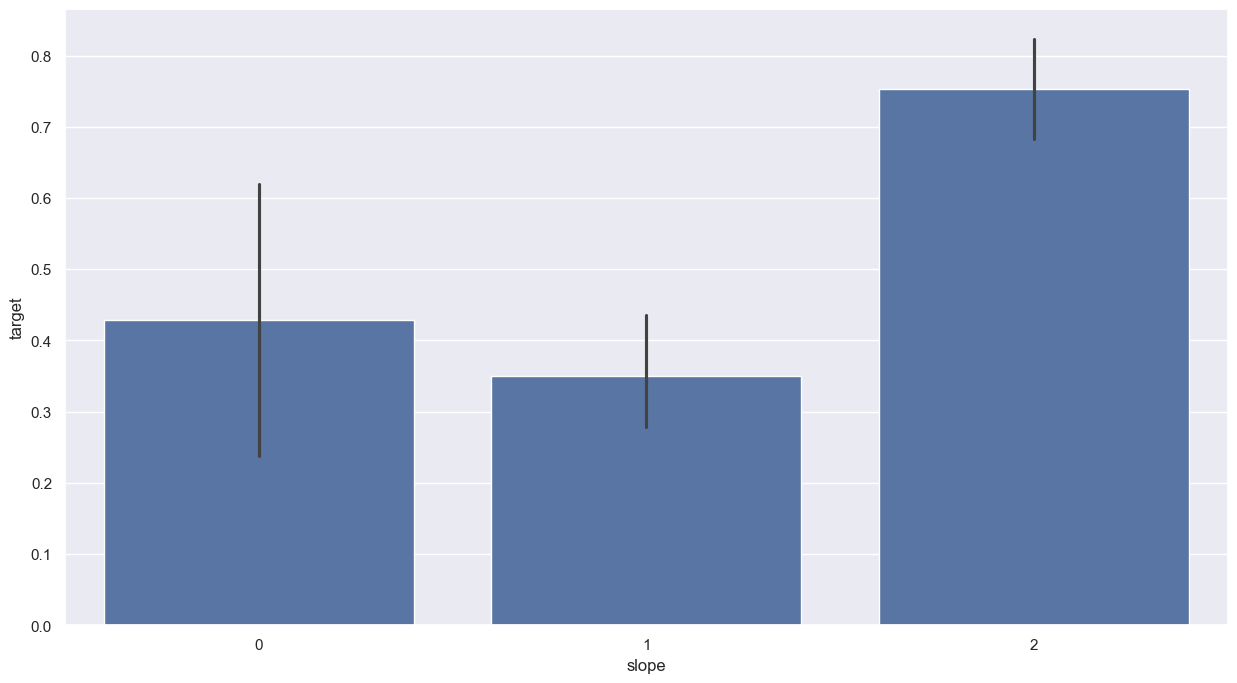

In [261]:
sns.barplot(x=df["slope"], y=df["target"])

we notice the slope is 2 because heart pain more than slope "0" and "1"

### Analysing the 'ca' feature

In [262]:
#number of major vessels 0-3

In [263]:
df["ca"].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='target'>

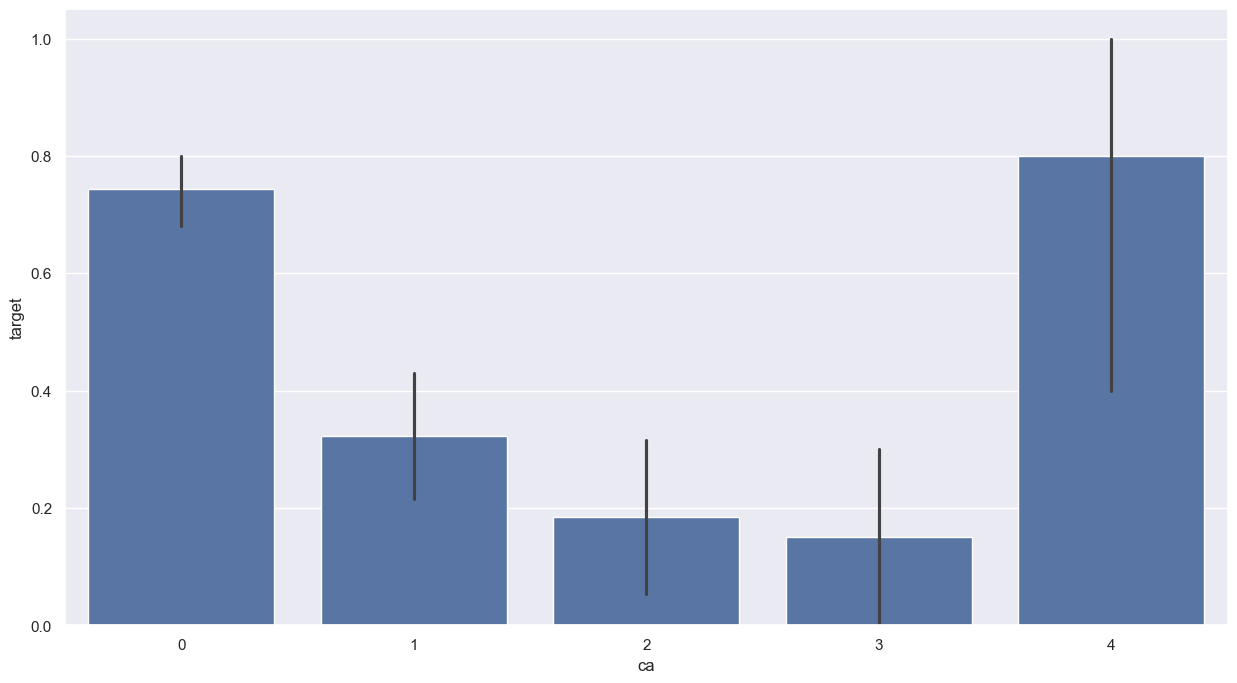

In [264]:
sns.barplot(x=df["ca"], y=df["target"])

ca is 4 has large number of heart patinets

<Axes: xlabel='ca', ylabel='Count'>

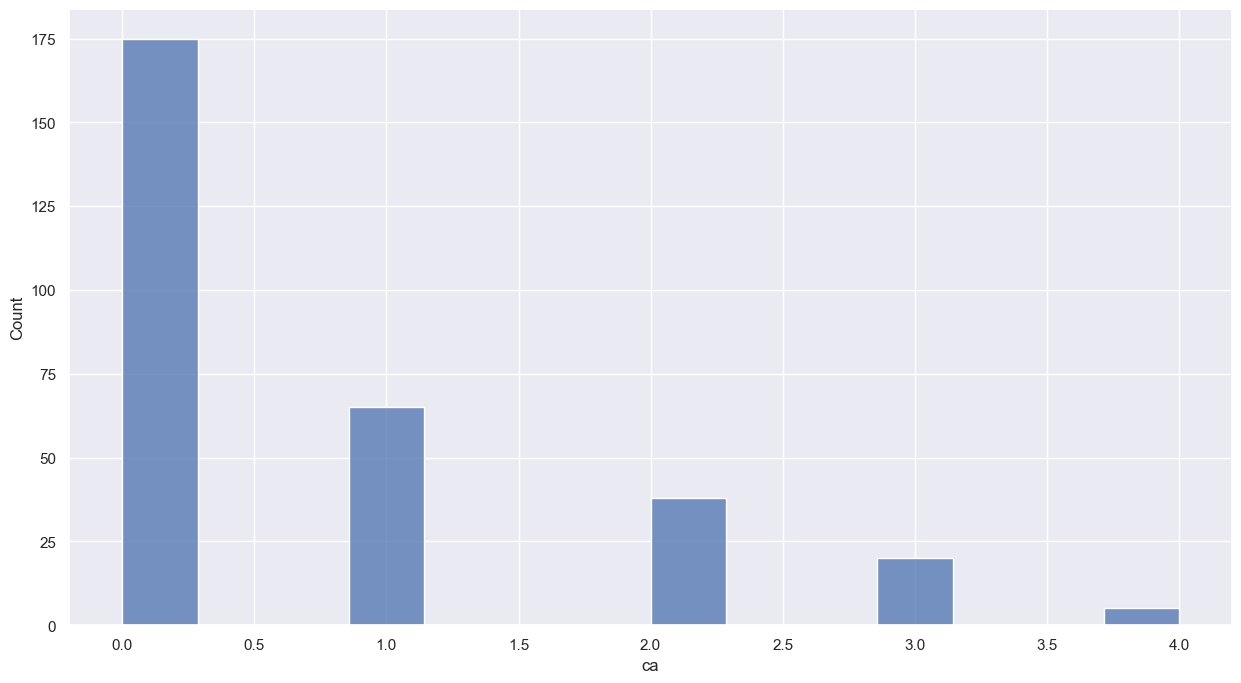

In [265]:
sns.histplot(df["ca"])

### Analysing the 'thal' feature

In [266]:
df["thal"].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='target'>

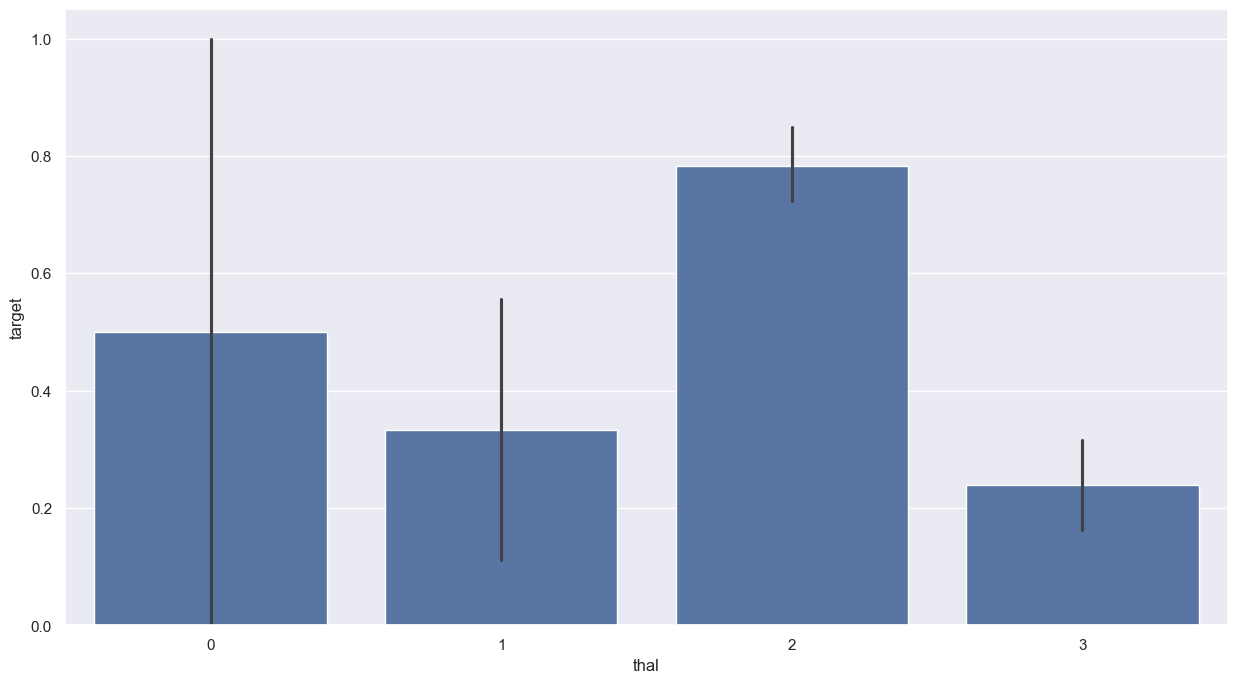

In [267]:
sns.barplot(x=df["thal"], y=df["target"])

<Axes: xlabel='thal', ylabel='Density'>

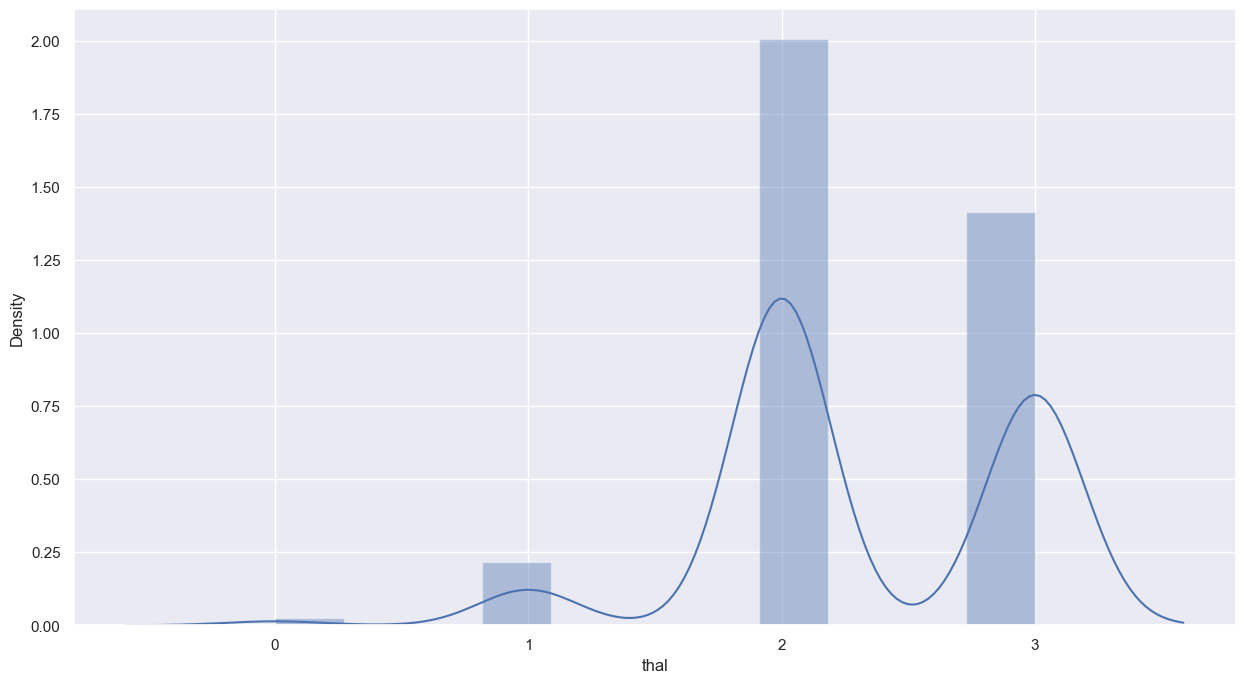

In [268]:
sns.distplot(df["thal"])

### Train Test split

In [269]:
x = df.drop(columns="target", axis=1)
y = df["target"]

In [270]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [271]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [272]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2, random_state=2)

In [273]:
x_tr.shape

(242, 13)

In [274]:
x_te.shape

(61, 13)

In [275]:
y_tr.shape

(242,)

In [276]:
y_te.shape

(61,)

### Model Fitting

### Logistic Regression

In [277]:
model = LogisticRegression()

In [278]:
model.fit(x_tr,y_tr)

LogisticRegression()

In [279]:
x_tr_pred = model.predict(x_tr)
training_data_accuracy = accuracy_score(x_tr_pred,y_tr)

In [280]:
print("Accuracy on Training data : ",training_data_accuracy)

Accuracy on Training data :  0.8305785123966942


In [281]:
model = round(accuracy_score(x_tr_pred,y_tr)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(model)+" %")

The accuracy score achieved using Logistic Regression is: 83.06 %


### Naive Bayes

In [282]:
model2 = GaussianNB()

In [283]:
model2.fit(x_tr,y_tr)

GaussianNB()

In [284]:
x_tr_pred = model2.predict(x_tr)
training_data_accuracy = accuracy_score(x_tr_pred,y_tr)

In [285]:
print("Accuracy on Training data : ",training_data_accuracy)

Accuracy on Training data :  0.8181818181818182


In [286]:
mode2 = round(accuracy_score(x_tr_pred,y_tr)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(model2)+" %")

The accuracy score achieved using Naive Bayes is: GaussianNB() %


### Support Vector Machine (SVM)

In [287]:
model3 = SVC()

In [288]:
model3.fit(x_tr,y_tr)

SVC()

In [289]:
x_tr_pred = model3.predict(x_tr)
training_data_accuracy = accuracy_score(x_tr_pred,y_tr)

In [290]:
print("Accuracy on Training data : ",training_data_accuracy)

Accuracy on Training data :  0.640495867768595


In [291]:
model3 = round(accuracy_score(x_tr_pred,y_tr)*100,2)

print("The accuracy score achieved using SVM is: "+str(model3)+" %")

The accuracy score achieved using SVM is: 64.05 %


### K Nearest Neighbors

In [292]:
model4 = KNeighborsClassifier()

In [293]:
model4.fit(x_tr,y_tr)

KNeighborsClassifier()

In [294]:
x_tr_pred = model4.predict(x_tr)
training_data_accuracy = accuracy_score(x_tr_pred,y_tr)

In [295]:
print("Accuracy on Training data : ",training_data_accuracy)

Accuracy on Training data :  0.7396694214876033


In [296]:
model4 = round(accuracy_score(x_tr_pred,y_tr)*100,2)

print("The accuracy score achieved using KNN is: "+str(model4)+" %")

The accuracy score achieved using KNN is: 73.97 %


### Random Forest

In [297]:
model5 = RandomForestClassifier()

In [298]:
model5.fit(x_tr,y_tr)

RandomForestClassifier()

In [299]:
x_tr_pred = model5.predict(x_tr)
training_data_accuracy = accuracy_score(x_tr_pred,y_tr)

In [300]:
print("Accuracy on Training data : ",training_data_accuracy)

Accuracy on Training data :  1.0


In [301]:
model5 = round(accuracy_score(x_tr_pred,y_tr)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(model6)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


### Final Output Score

The accuracy score achieved using Logistic Regression is: 83.06 %
The accuracy score achieved using Naive Bayes is 0.81 %
The accuracy score achieved using SVM is: 64.05 %
The accuracy score achieved using KNN is: 73.97 %
The accuracy score achieved using Random Forest is: 100.0 %
The random forest has good result as compare to other algorithms